In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
cc_df = pd.read_csv('/content/gdrive/MyDrive/ML-assignment/CC.csv')
cc_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
cc_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


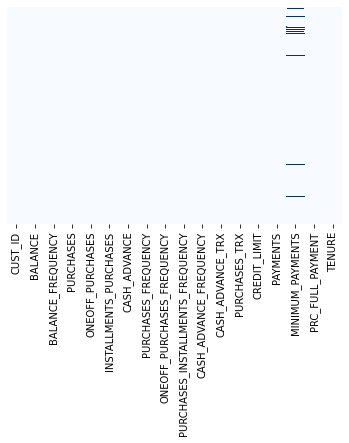

In [ ]:
#We can get a rough idea of our missing Data using a heatmap
sns.heatmap(cc_df.isnull(),yticklabels = False,cbar = False, cmap = "Blues",linecolor = "Black")

In [ ]:
cc_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
cc_df['CREDIT_LIMIT'] = cc_df['CREDIT_LIMIT'].fillna(cc_df['CREDIT_LIMIT'].mean())
cc_df['MINIMUM_PAYMENTS'] = cc_df['MINIMUM_PAYMENTS'].fillna(cc_df['MINIMUM_PAYMENTS'].mean())

In [ ]:
cc_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
cc_df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

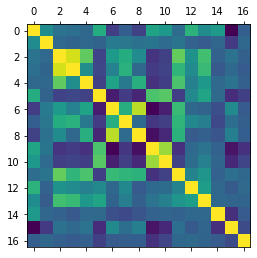

In [ ]:
plt.matshow(cc_df.corr())

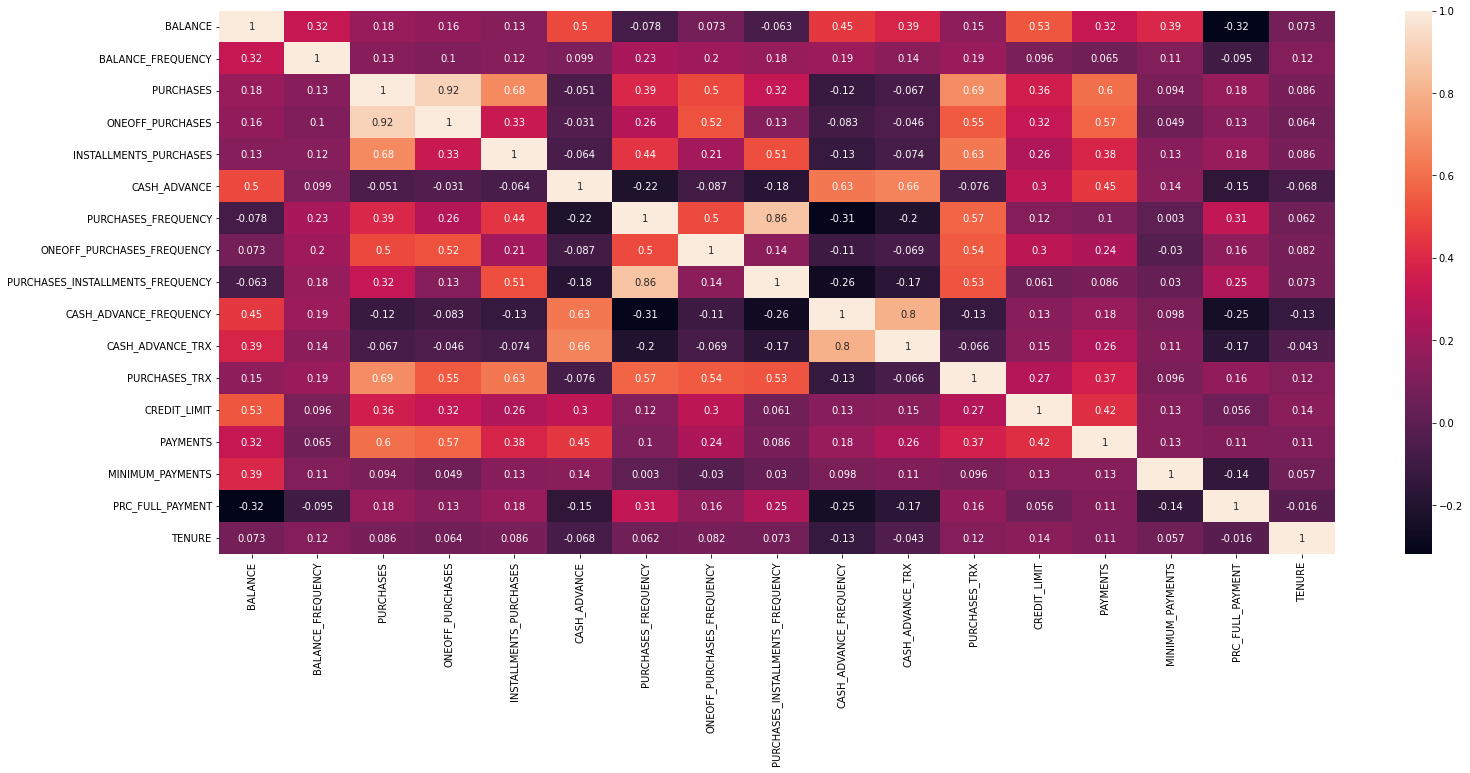

In [ ]:
f, ax = plt.subplots(figsize = (25,10))
sns.heatmap(cc_df.corr(),annot = True)

In [ ]:
x = cc_df.iloc[:,:-1]
y = cc_df.iloc[:,-1]
x = x.drop(columns=['CUST_ID'], axis=1)

In [ ]:
x.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

In [ ]:
pca = PCA(2)
x_pca = pca.fit_transform(x)
cc_df2 = pd.DataFrame(data=x_pca, columns=['component_1', 'component_2'])
final_df = pd.concat([cc_df2, cc_df[['TENURE']]], axis=1)

final_df.head()

,component_1,component_2,TENURE
0,-4326.383979,921.566882,12
1,4118.916665,-2432.846346,12
2,1497.907641,-1997.578694,12
3,1394.548536,-1488.743453,12
4,-3743.351896,757.342657,12


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
score = []
for i in range(1,11):
  model = KMeans(n_clusters=i)
  model.fit(final_df)
  score.append(model.inertia_)

([<matplotlib.axis.XTick at 0x7f76f4351ad0>,
 <a list of 10 Text major ticklabel objects>)

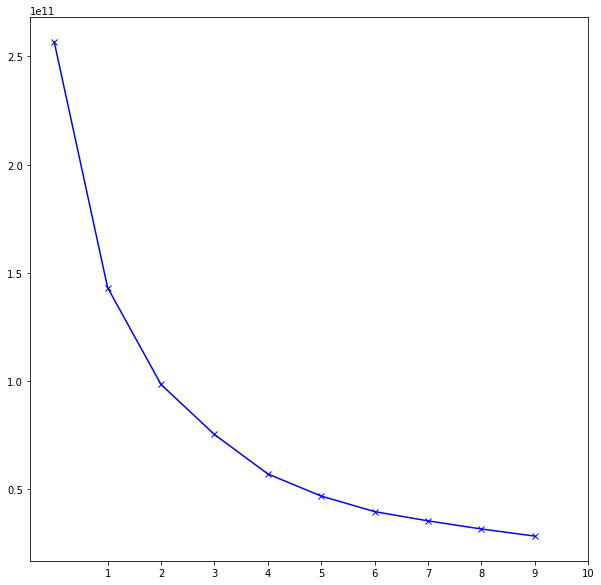

In [ ]:
#Let's plot our WCSS over the range
plt.figure(figsize= (10,10))
plt.plot(score,'bx-')
plt.xticks(np.arange(1,11, step = 1))

In [ ]:
# we can see the k before the plot get's linear is 4
# our optimal k for our Data is k = 4
# Let's apply KMeans
model = KMeans(n_clusters=4)
model.fit(final_df)
labels = model.labels_


In [ ]:
from sklearn.metrics import silhouette_score
sscore = silhouette_score(final_df, model.labels_, metric='euclidean')

In [ ]:
print(sscore)

0.5025137542371804


In [ ]:
creditData = pd.read_csv('/content/gdrive/MyDrive/ML-assignment/CC.csv')
creditData.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
creditData.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
creditData['CREDIT_LIMIT'] = creditData['CREDIT_LIMIT'].fillna(creditData['CREDIT_LIMIT'].mean())
creditData['MINIMUM_PAYMENTS'] = creditData['MINIMUM_PAYMENTS'].fillna(creditData['MINIMUM_PAYMENTS'].mean())

In [ ]:
creditData.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
x = creditData.iloc[:,:-1]
y = creditData.iloc[:,-1]


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
# removing CUST_ID from Creditdata
# apply StandardScaler to the dataset
x = x.drop(columns=['CUST_ID'],axis=1)
creditDataScaled = scaler.fit_transform(x)
creditDataScaled


array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.52897879,
        -0.31096755, -0.52555097],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.81864213,
         0.08931021,  0.2342269 ],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.38380474,
        -0.10166318, -0.52555097],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.5706145 ,
        -0.33546549,  0.32919999],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.58053567,
        -0.34690648,  0.32919999],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.57686873,
        -0.33294642, -0.52555097]])

In [ ]:
# Apply PCA for the scaled Credit Data 
pca = PCA(n_components=2)
pca_creditdata = pca.fit_transform(creditDataScaled)
pca_creditdata_df = pd.DataFrame(pca_creditdata, columns=['component_1', 'component_2'])
creditfinal_df = pd.concat([pca_creditdata_df, y], axis=1)
creditfinal_df.head()

,component_1,component_2,TENURE
0,-1.718893,-1.072937,12
1,-1.169308,2.509327,12
2,0.938412,-0.382580,12
3,-0.907503,0.045862,12
4,-1.637830,-0.684973,12


In [ ]:
score = []
for i in range(1,11):
  model = KMeans(n_clusters=i)
  model.fit(creditfinal_df)
  score.append(model.inertia_)
  

([<matplotlib.axis.XTick at 0x7f76f157e750>,
 <a list of 10 Text major ticklabel objects>)

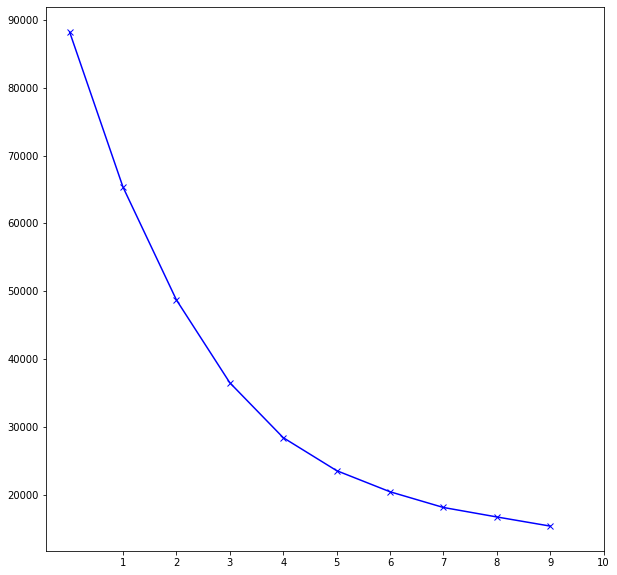

In [ ]:
#Let's plot our WCSS over the range
plt.figure(figsize= (10,10))
plt.plot(score,'bx-')
plt.xticks(np.arange(1,11, step = 1))

In [ ]:
# we can see the k before the plot get's linear is 4
# our optimal k for our Data is k = 4
# Let's apply KMeans
model = KMeans(n_clusters=4)
model.fit(final_df)
labels = model.labels_


In [ ]:
sscore = silhouette_score(final_df, model.labels_, metric='euclidean')
print(sscore)

0.43767053303119136
